In [59]:
# Importing the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [60]:
dataset = pd.read_csv("D:/DATASETS/iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
dataset = dataset.drop('Id',axis=1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [63]:
dataset.shape

(150, 5)

In [64]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [65]:
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


<h3>box and whisker plots</h3>

<AxesSubplot:>

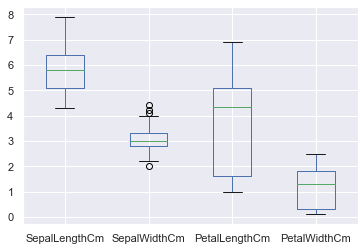

In [66]:
dataset.plot(kind='box', sharex=False, sharey=False)

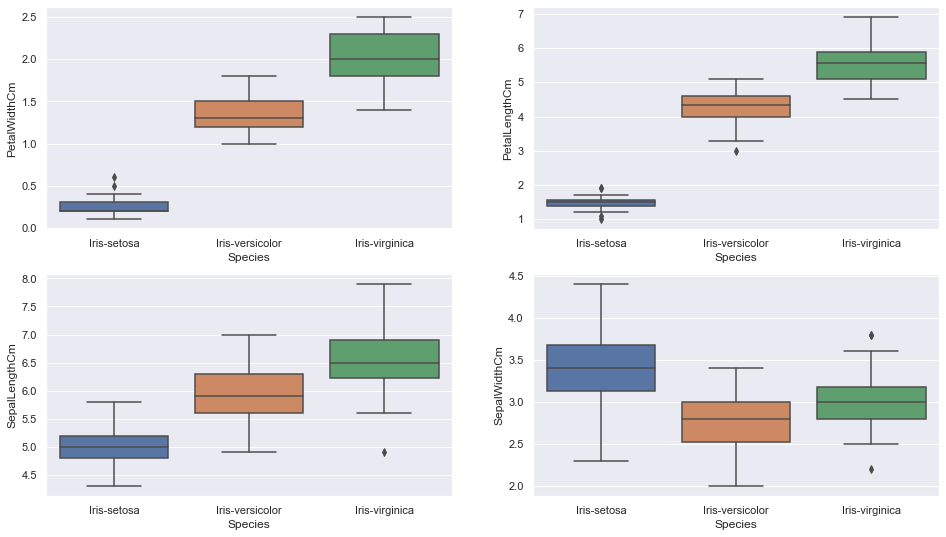

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y="PetalWidthCm", x= "Species", data=dataset, orient='v' , ax=axes[0, 0])
sns.boxplot( y="PetalLengthCm", x= "Species", data=dataset, orient='v' , ax=axes[0, 1])
sns.boxplot( y="SepalLengthCm", x= "Species", data=dataset, orient='v' , ax=axes[1, 0])
sns.boxplot( y="SepalWidthCm", x= "Species", data=dataset, orient='v' , ax=axes[1, 1])
plt.show()

<h3> histograms </h3>

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

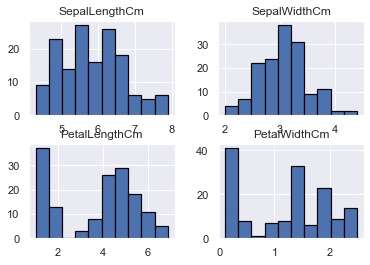

In [68]:
dataset.hist(edgecolor='black', linewidth=1.2)

<h3>Violin Plot </h3>

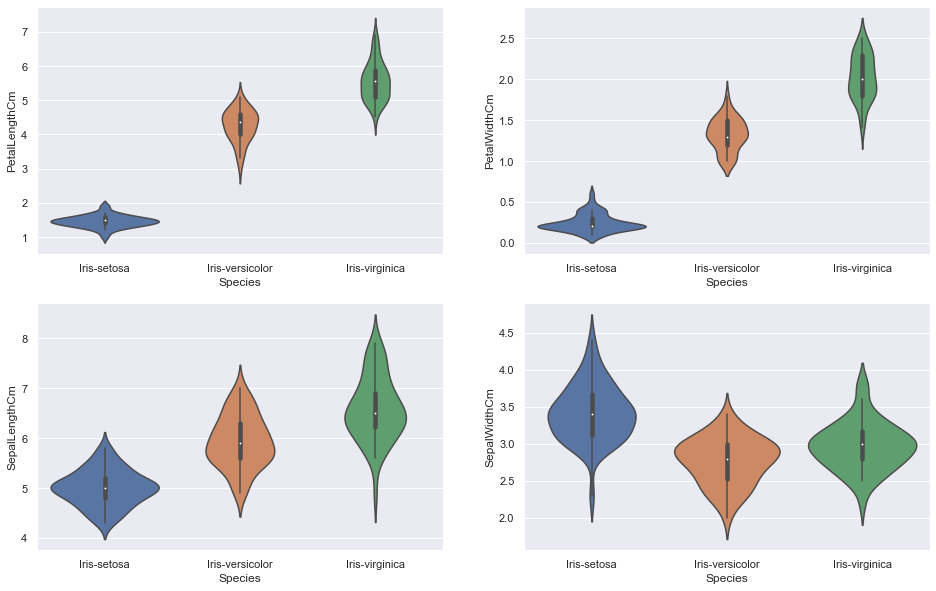

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
sns.violinplot( y="PetalLengthCm", x= "Species", data=dataset, ax=axes[0, 0])
sns.violinplot( y="PetalWidthCm", x= "Species", data=dataset, ax=axes[0, 1])
sns.violinplot( y="SepalLengthCm", x= "Species", data=dataset, ax=axes[1, 0])
sns.violinplot( y="SepalWidthCm", x= "Species", data=dataset, ax=axes[1, 1])
plt.show()

#### Seperating the data into dependent and independent variables

In [70]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Logistic Regression

In [72]:
LR = LogisticRegression()
LR.fit(X_train, y_train )

y_pred = LR.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.88      1.00      0.93        14
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45

[[16  0  0]
 [ 0 14  0]
 [ 0  2 13]]
accuracy is 0.9555555555555556


### Naive Bayes

In [73]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

y_pred = GNB.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('accuracy is ', accuracy_score(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.88      1.00      0.93        14
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45

[[16  0  0]
 [ 0 14  0]
 [ 0  2 13]]
accuracy is  0.9555555555555556


### Support Vector Machine
<br> here we import SVC == Supprt Vector Classifier

In [74]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('accuracy is', accuracy_score(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 14  0]
 [ 0  1 14]]
accuracy is 0.9777777777777777


### K-Nearest Neighbours

In [75]:
KNN = KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[16  0  0]
 [ 0 14  0]
 [ 0  1 14]]
accuracy is 0.9777777777777777


### Decision Tree

In [76]:
DT = DecisionTreeClassifier()

DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.88      1.00      0.93        14
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45

[[16  0  0]
 [ 0 14  0]
 [ 0  2 13]]
accuracy is 0.9555555555555556
